In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import pandas as pd
from scipy.stats import norm
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

## Normal distribution 

In [51]:
# Plot settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12.0,8.0]
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2.0
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Load the CSV file
df = pd.read_csv('C:/Users/svbes/Desktop/Projects/PythonLab/data/gbpusd.csv', index_col=0, parse_dates=True, dayfirst=True)['2011':'2023']
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0.0
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0.0
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0.0
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0.0
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0.0
...,...,...,...,...,...,...
2023-01-13,1.221643,1.224695,1.215185,1.221777,1.221777,0.0
2023-01-16,1.222464,1.228864,1.217434,1.222673,1.222673,0.0
2023-01-17,1.220882,1.229982,1.217063,1.220778,1.220778,0.0


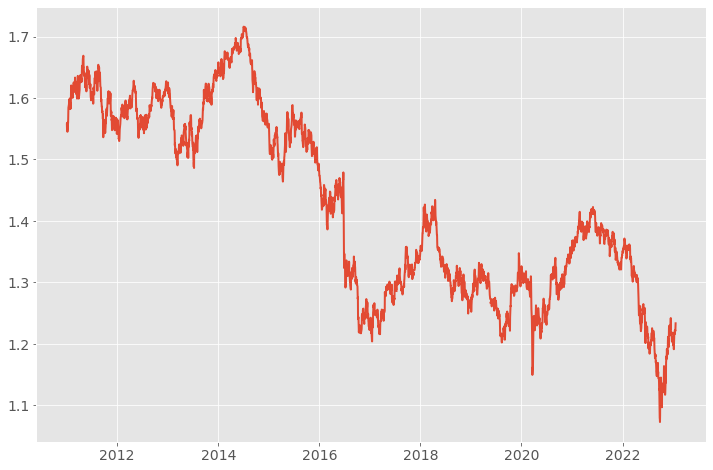

In [53]:
# Visualize the plot to verify the data
plt.plot(df.index, df['Adj Close'])

In [54]:
# Verify t
df.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19'],
              dtype='datetime64[ns]', name='Date', length=3144, freq=None)

In [55]:
# get last 300 index values
df.index[-300:]

DatetimeIndex(['2021-11-26', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09',
               ...
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19'],
              dtype='datetime64[ns]', name='Date', length=300, freq=None)

In [56]:
# Calculate returns and add it to existing DataFrame as a column
df['Return'] = df['Adj Close'].pct_change().fillna(0)
# Get first 5 rows
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0.0,0.000000
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0.0,-0.005313
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0.0,0.006988
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0.0,-0.005507
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0.0,-0.003940


In [57]:
# Calculate mean and sigma
mu = np.mean(df['Return'])
sigma = np.std(df['Return'])
mu, sigma

(-5.8101830257450726e-05, 0.005655464234175417)

In [58]:
def zscore(returns):
    zs = (returns - np.mean(returns))/np.std(returns)
    return zs

In [59]:
# Calculate the scaled return : zscore
df['Scaled_Return'] = df['Return'].apply(lambda _: (_-mu)/sigma)
# Check the output
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Scaled_Return
Date,,,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0.0,0.000000,0.010274
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0.0,-0.005313,-0.929099
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0.0,0.006988,1.245869
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0.0,-0.005507,-0.963499
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0.0,-0.003940,-0.686313


In [60]:
# Calculate minimum and maximum bin range
sr_min = np.min(df['Scaled_Return'])
sr_max = np.max(df['Scaled_Return'])
sr_min, sr_max

(-13.434929545274647, 5.451295057860446)

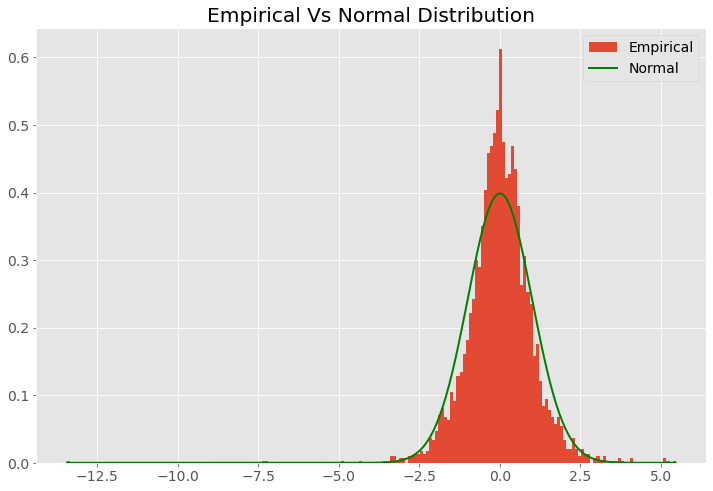

In [61]:
# Define bins - x
x = np.linspace(sr_min, sr_max, 200)
# Calculate normal probability density function - y
y = (1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2))
# Plot histogram of scaled returns
plt.hist(df['Scaled_Return'], bins=200, density=True, label='Empirical', alpha=1)
# Plot norm pdf
plt.plot(x,y, color='green', label='Normal', alpha=1)
# Set x and y axis limits
# plt.xlim(-4,4)
# plt.ylim(0,0.7)
# Set title
plt.title('Empirical Vs Normal Distribution')
# Set legends
plt.legend()
plt.show()

## Binomial Model

In [62]:
# Hard coded for Binomial Plot
n = 4 #hard coded

# Plot Binomial Grid
def binomial_grid(n):

    G=nx.Graph()
    for i in range(0,n+1):
        for j in range(1,i+2):
            if i<n:
                G.add_edge((i,j),(i+1,j))
                G.add_edge((i,j),(i+1,j+1))
    posG={}
    for node in G.nodes():
        posG[node]=(node[0],n+2+node[0]-2*node[1])
    
    nx.draw(G,pos=posG)

# Plot Asset Path - Text 
def plot_asset_path():

    plt.figure(figsize=(8, 6))

    # Start
    plt.figtext(0.02,0.49,'S')

    # Step 1
    plt.figtext(0.3,0.66,'uS')
    plt.figtext(0.3,0.3,'vS')

    # Step 2
    plt.figtext(0.5,0.76,'$u^2S$')
    plt.figtext(0.5,0.55,'uvS')
    plt.figtext(0.5,0.22,'$v^2S$')

    # Step 3
    plt.figtext(0.7,0.86,'$u^3S$')
    plt.figtext(0.7,0.66,'$u^2vS$') 
    plt.figtext(0.7,0.45,'$uv^2S$')
    plt.figtext(0.7,0.11,'$v^3S$')

    # Step 4
    plt.figtext(0.9,0.95,'$u^4S$')
    plt.figtext(0.9,0.75,'$u^3vS$')
    plt.figtext(0.9,0.55,'$u^2v^2S$')
    plt.figtext(0.9,0.35,'$uv^3S$')
    plt.figtext(0.9,0.03,'$v^4S$')

    binomial_grid(n)

# Plot Probability - Text
def plot_probability():

    plt.figure(figsize=(8, 6))

    # Start
    plt.figtext(0.02,0.49,'1')

    # Step 1
    plt.figtext(0.3,0.66,'p')
    plt.figtext(0.3,0.3,'1-p')

    # Step 2
    plt.figtext(0.5,0.76,'$p^2$')
    plt.figtext(0.5,0.55,'2p(1-p)')
    plt.figtext(0.5,0.20,'$(1-p)^2$')

    # Step 3
    plt.figtext(0.7,0.86,'$p^3$')
    plt.figtext(0.7,0.66,'$3p^2(1-p)$')
    plt.figtext(0.7,0.45,'$3p(1-p)^2$')
    plt.figtext(0.7,0.11,'$(1-p)^3$')

    # Step 4
    plt.figtext(0.9,0.95,'$p^4$')
    plt.figtext(0.9,0.75,'$4p^3(1-p)$')
    plt.figtext(0.9,0.55,'$6p^2(1-p)^2$')
    plt.figtext(0.9,0.35,'$4p(1-p)^3$')
    plt.figtext(0.9,0.00,'$(1-p)^4$')

    binomial_grid(n)

# Plot Price and Option Tree
def plot_binomial_tree(initial_spot, asset_array, option_array, delta_array):

    s = initial_spot
    px = asset_array
    opx = option_array
    delta = delta_array

    plt.figure(figsize=(8, 6))

    # Start
    plt.figtext(-0.07,0.50, 'S = '+str(s))
    plt.figtext(-0.07,0.47, 'V = '+str(opx[0,0]))
    plt.figtext(-0.07,0.44, '$\Delta$ = '+str(delta[0,0]))

    # Step 1
    plt.figtext(0.27,0.73, 'S = '+str(px[0,1]))
    plt.figtext(0.27,0.70, 'V = '+str(opx[0,1]))
    plt.figtext(0.27,0.67, '$\Delta$ = '+str(delta[0,1]))
    plt.figtext(0.27,0.30, 'S = '+str(px[1,1]))
    plt.figtext(0.27,0.27, 'V = '+str(opx[1,1]))
    plt.figtext(0.27,0.24, '$\Delta$ = '+str(delta[1,1]))

    # Step 2
    plt.figtext(0.5,0.84, 'S = '+str(px[0,2]))
    plt.figtext(0.5,0.81, 'V = '+str(opx[0,2]))
    plt.figtext(0.5,0.78, '$\Delta$ = '+str(delta[0,2]))
    plt.figtext(0.5,0.63, 'S = '+str(px[1,2]))
    plt.figtext(0.5,0.60, 'c = '+str(opx[1,2]))
    plt.figtext(0.5,0.57, '$\Delta$ = '+str(delta[1,2]))
    plt.figtext(0.5,0.20, 'S = '+str(px[2,2]))
    plt.figtext(0.5,0.17, 'c = '+str(opx[2,2]))
    plt.figtext(0.5,0.14, '$\Delta$ = '+str(delta[2,2]))

    # Step 3
    plt.figtext(0.7,0.96, 'S = '+str(px[0,3]))
    plt.figtext(0.7,0.93, 'V = '+str(opx[0,3]))
    plt.figtext(0.7,0.90, '$\Delta$ = '+str(delta[0,3]))
    plt.figtext(0.7,0.73, 'S = '+str(px[1,3]))
    plt.figtext(0.7,0.70, 'V = '+str(opx[1,3]))
    plt.figtext(0.7,0.67, '$\Delta$ = '+str(delta[1,3]))
    plt.figtext(0.7,0.50, 'S = '+str(px[2,3]))
    plt.figtext(0.7,0.47, 'V = '+str(opx[2,3]))
    plt.figtext(0.7,0.43, '$\Delta$ = '+str(delta[2,3]))
    plt.figtext(0.7,0.09, 'S = '+str(px[3,3]))
    plt.figtext(0.7,0.06, 'V = '+str(opx[3,3]))
    plt.figtext(0.7,0.03, '$\Delta$ = '+str(delta[3,3]))

    # Step 4
    plt.figtext(0.9,1.05, 'S = '+str(px[0,4]))
    plt.figtext(0.9,1.02, 'V = '+str(opx[0,4]))
    plt.figtext(0.9,0.99, '$\Delta$ = '+str(delta[0,4]))
    plt.figtext(0.9,0.83, 'S = '+str(px[1,4]))
    plt.figtext(0.9,0.80, 'V = '+str(opx[1,4]))
    plt.figtext(0.9,0.77, '$\Delta$ = '+str(delta[1,4]))
    plt.figtext(0.9,0.60, 'S = '+str(px[2,4]))
    plt.figtext(0.9,0.57, 'V = '+str(opx[2,4]))
    plt.figtext(0.9,0.54, '$\Delta$ = '+str(delta[2,4]))
    plt.figtext(0.9,0.39, 'S = '+str(px[3,4]))
    plt.figtext(0.9,0.36, 'V = '+str(opx[3,4]))
    plt.figtext(0.9,0.33, '$\Delta$ = '+str(delta[3,4]))
    plt.figtext(0.9,-0.01, 'S = '+str(px[4,4]))
    plt.figtext(0.9,-0.04, 'V = '+str(opx[4,4]))
    plt.figtext(0.9,-0.07, '$\Delta$ = '+str(delta[4,4]))

    binomial_grid(n)

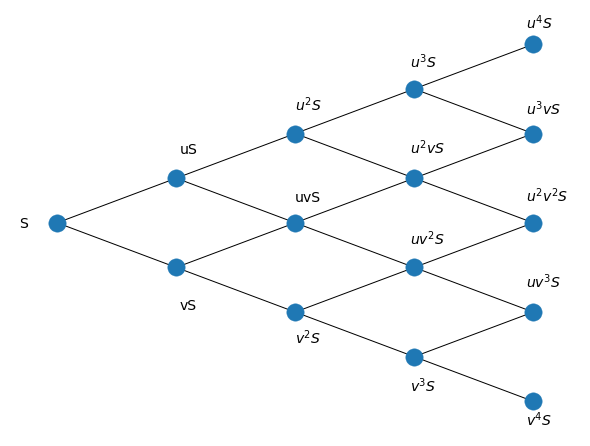

In [63]:
# Plot asset price path
plot_asset_path()

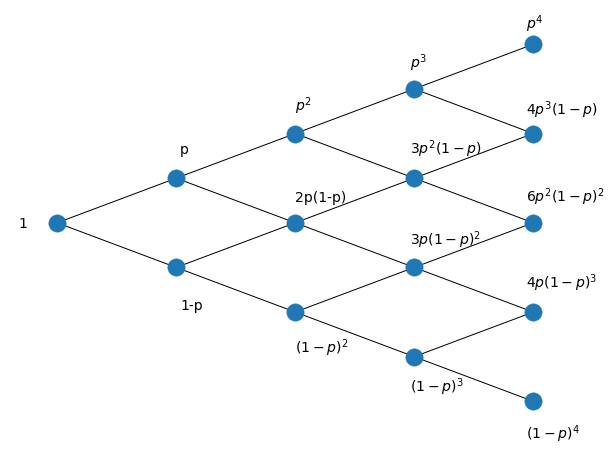

In [64]:
# Plot node probability
plot_probability()

In [65]:
# Create a user defined function
def binomial_option(spot, strike, rate, sigma, time, steps, output=0):
    """
    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    Function for building binomial option tree for european call option payoff
    Params
    ------
    spot int or float - spot price
    strike int or float - strike price
    rate float - interest rate
    sigma float - volatility
    time int or float - expiration time
    steps int - number of trees
    output int - [0: price, 1: payoff, 2: option value, 3:␣
    option delta]
    Returns
    -------
    out: ndarray
    An array object of price, payoff, option value and delta specified by the␣
    output parameter
    """
    # params
    ts = time/steps
    u = 1+sigma*sqrt(ts)
    v = 1- sigma*sqrt(ts)
    p = 0.5+rate*sqrt(ts)/(2*sigma)
    df = 1/(1+rate*ts)
    # initialize arrays
    px = zeros((steps+1, steps+1))
    cp = zeros((steps+1, steps+1))
    V = zeros((steps+1, steps+1))
    d = zeros((steps+1, steps+1))
    # binomial loop
    
    # forward loop
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot*power(v,i)*power(u,j-i)
            cp[i,j] = maximum(px[i,j]-strike, 0)
            
    # reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j==steps+1):
                V[i,j-1] = cp[i,j-1]
                d[i,j-1] = 0
            else:
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
    results = around(px,2), around(cp,2), around(V,2), around(d,4)
    return results[output]

In [66]:
# Asset price
px = binomial_option(100,100,0.05,0.2,1,4,0)
px

array([[100.  , 110.  , 121.  , 133.1 , 146.41],
       [  0.  ,  90.  ,  99.  , 108.9 , 119.79],
       [  0.  ,   0.  ,  81.  ,  89.1 ,  98.01],
       [  0.  ,   0.  ,   0.  ,  72.9 ,  80.19],
       [  0.  ,   0.  ,   0.  ,   0.  ,  65.61]])

In [67]:
# Intrinsic value of call options
cp = binomial_option(100,100,0.05,0.2,1,4,1)
cp

array([[ 0.  , 10.  , 21.  , 33.1 , 46.41],
       [ 0.  ,  0.  ,  0.  ,  8.9 , 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [68]:
# Option price
opx = binomial_option(100,100,0.05,0.2,1,4,2)
opx

array([[10.29, 15.88, 23.83, 34.33, 46.41],
       [ 0.  ,  3.39,  6.11, 10.99, 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [69]:
# Option delta
d = binomial_option(100,100,0.05,0.2,1,4,3)
d

array([[0.6241, 0.8053, 0.9645, 1.    , 0.    ],
       [0.    , 0.3393, 0.5553, 0.9086, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ]])

In [70]:
# Binomial Option Price
print(f"European Call Option Price using Binomial Tree Method: {opx[0,0]:.2f}")

European Call Option Price using Binomial Tree Method: 10.29


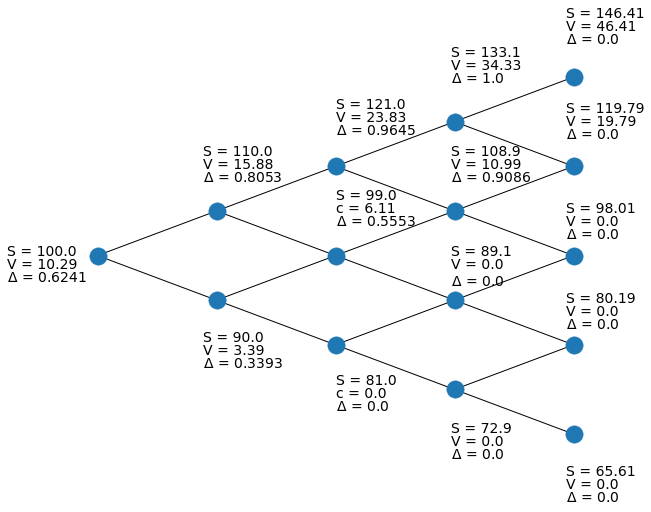

In [71]:
# Plot a 4-Step Binomial Tree
plot_binomial_tree(px[0,0], px, opx, d)